# Comparing models

Choosing a model is more complicated than choosing the model with predictions that come closest to the data, and it requires accoounting for both the **number of parameters** and the **goodness of fit**.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Linear regression as a comparison of models

We can use P value and R² from a linear regression but switch the focus to comparing two models, the linear regression model and the null hypothesis model i.e. a horizontal line at the mean of all Y values.

In [2]:
# data from chapter 32
insulin_sensitiv=np.array([250,  220,  145,  115,  230,  200,  330,  400,  370,  260,  270,  530,  375 ])
C2022_fatacids = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

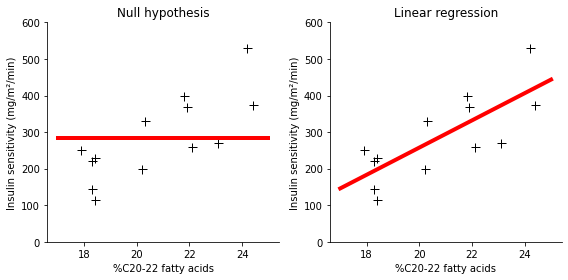

In [3]:
res = stats.linregress(x=C2022_fatacids, y=insulin_sensitiv)

plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
plt.plot(C2022_fatacids, insulin_sensitiv, 'k+', ms=9)
plt.ylim(0,600)

x=np.array([17, 25])
plt.plot(x, res.slope*x + res.intercept, 'r-', lw=4)

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.title("Linear regression")

plt.subplot(1,2,1)
plt.plot(C2022_fatacids, insulin_sensitiv, 'k+', ms=9)
plt.ylim(0,600)

x=np.array([17, 25])
plt.plot(x, (np.mean(insulin_sensitiv), np.mean(insulin_sensitiv)), 'r-', lw=4)

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.title("Null hypothesis")

plt.tight_layout()
sns.despine();

### R²

The linear regression model fits the data better, the variability of points around the regression line is less than the variability of points around the null hypothesis horizontal line. Remind that R² equals the difference of total sum of squares (TSS), _i.e. around the horizontal line_, to residual sum of squares (RSS), _i.e. around the regression line_, divided by the TSS $ R^2 = \frac{\text{TSS}-\text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}} $, where $ \text{MSE} = \frac{\sum (\text{true} - \text{pred})^2}{n-p-1}$, with $p$ the total number of predictor variables in the model and $n$ the sample size.

In [4]:
def compute_rss(y_estimate, y): 
  return sum(np.power(y-y_estimate, 2)) 

def estimate_y(x, b_0, b_1): 
  return b_0 + b_1 * x

y = insulin_sensitiv
x = C2022_fatacids

beta_0 = res.intercept
beta_1 = res.slope

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
tss = compute_rss(np.mean(y),                    y)

print(f"R² using TSS and RSS: {(tss-rss)/tss:.4f}")

R² using TSS and RSS: 0.5929


In [5]:
print(f"scatter from regression line (RSS): {rss:6.1f}")
print(f"scatter from horizontal line (TSS): {tss:6.1f}")
print(f"Percentage of variation for the regression line = {rss/tss:3.1%}")

scatter from regression line (RSS): 63361.4
scatter from horizontal line (TSS): 155642.3
Percentage of variation for the regression line = 40.7%


Scatter around the regression line accounts for 40.7% of the variation. Therefore the linear regression model itself accounts for 100% - 40.7% = 59.3% of the variation. This is the definition of R², which equals 0.593. It show how much better the linear regression model fits than the alternative null hypothesis model. **R² measures the extent of the improvement from the null hypothesis to the regression line.**

Comparing the fit of a horizontal line vs. best-fit linear regression line:

| Hypothesis  | Scatter from    | Sum squares | Variation | R²    |
|:----------- |:--------------- |:----------- |:--------- |:----- |
| Null        | Horizontal line |   155642    |  100.0%   |       |
| Alternative | Regression line |    63361    |  40.7%    |       |
| Difference  | Improvement     |    92281    |  59.3%    | 0.593 |

#### Residual plots

In [6]:
resid_lin = insulin_sensitiv - estimate_y(C2022_fatacids, beta_0, beta_1)
resid_h0  = insulin_sensitiv - np.mean(insulin_sensitiv)

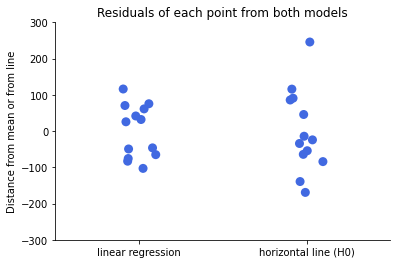

In [7]:
sns.stripplot(data=[resid_lin, resid_h0], color='royalblue', size=9)
plt.ylabel("Distance from mean or from line")
plt.ylim((-300, 300))
plt.xticks([0,1], ['linear regression', 'horizontal line (H0)'])
plt.title("Residuals of each point from both models")
sns.despine();

### P value

Comparaing the fit of a horizontal line vs the best-fit linear regression line (ANOVA table) by dividing the total sum of squares into its components:

| Source of variation | Hypothesis  | Scatter from    | Sum of squares | DF | MS     | F ratio | P value |
|:------------------- |:----------- |:--------------- |:-------------- |:-- |:------ |:------- |:------- |
| Regression (model)  | Difference  | Improvement     |      92281     | 1  | 92281  |  16.0   | 0.0021  |
| Random (residues)   | Alternative | Regression line |      63361     | 11 | 5760.1 |         |         |
| Total (grand mean)  | Null        | Horizontal line |     155642     | 12 |        |         |         |

1. **Total** shows the sum of squares of the distances from the fit of the null hypothesis, _13 data points minus one parameter (the mean)_ leaves 12 DF.
2. **Random**, also called *variation between groups*, shows the sum of squares from the linear regression, _two parameters are fitted (slope and intercept)_ leaving 11 DF.
3. **Regression**, also called *variation between groups*, shows the difference and the linear model has one more parameter than the null hypothesis.

Mean square (MS), also called *variances*, is the the sum of squares divided by DF. Indeed, even if the null hypothesis were correct, you'd expect the sum of squares around the regression line to be a bit smaller than the sum of squares around the horizontal line. **Dividing by the number of df accounts for this difference.**

If the null hypothesis were true, the two MS values would be expected to have similar values, so their ratio would be close to 1.0.

The distribution of the *F ratio* is known when the null hypothesis is true, and a P value can be computed for any value of F and for particular values of the two df values. The P value answers this question, if the null hypothesis were true and given an experimental design with one and 11 df, what is the chance that random sampling would result in data with such a strong linear trend that the F ratio would be 16.0 or higher?

The approach described here can only compare **two related models**, one model must be a simpler case of the other. The linear regression example does compare two related models, because the null hypothesis model is the same as the other model, with the slope fixed to equal zero. Another way to say this is that **the two models are nested**.

In [8]:
n = len(insulin_sensitiv)
dfn, dfd = 1, n-2 # dfs for the difference btw mean and regression, and regression resp

F = ((tss - rss) / dfn) / (rss / dfd)
print(f"F ratio = {F:3.1f}")

F ratio = 16.0


In [9]:
p_value = stats.f(dfn, dfd).sf(F) # same as 1 - cdf()
print(f"P values computed from the F ratio distribution = {p_value:5.4f}")

P values computed from the F ratio distribution = 0.0021


In [10]:
F_crit = stats.f(dfn, dfd).ppf(.95)
print(f"Critical value computed from the F ratio distribution = {F_crit:.1f}")

Critical value computed from the F ratio distribution = 4.8


#### Visualization of the F distribution

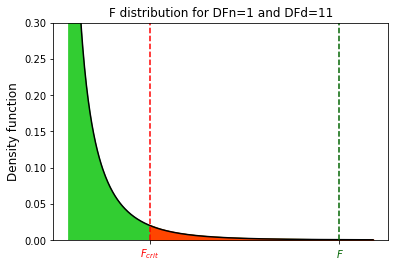

In [11]:
x = np.linspace(0, 18, num=500)
rvf = stats.f(dfn, dfd)
plt.plot(x, rvf.pdf(x), color='black')
hx = rvf.pdf(x)

plt.margins(y = 0)
plt.ylim((0, .3))

# Shade the probability p-value
plt.fill_between(x[x <= F], hx[x <= F], edgecolor = None, color = 'limegreen')
# plot the observed F ratio
plt.axvline(x = F, color = "darkgreen", linestyle = "--")
# Shade the probability alpha
plt.fill_between(
    x[x >= F_crit], hx[x >= F_crit], 
    edgecolor = "orangered", linestyle = "-", linewidth = 2, facecolor = 'orangered')

# plot the critical F value
plt.axvline(x = F_crit, color = "red", linestyle = "--")

ax=plt.gca()
ax.set_xticks([F_crit, F])
ax.set_xticklabels(["$F_{crit}$", "$F$"], fontdict={'size': 10})
ax.get_xticklabels()[0].set_color("red")
ax.get_xticklabels()[1].set_color("darkgreen")
plt.ylabel('Density function', fontdict={'size': 12})
plt.title(f"F distribution for DFn={dfn} and DFd={dfd}");

## Unpaired t test recast as comparing the fit of two models

In [12]:
# data from chapter 30
old = np.array([20.8, 2.8, 50,  33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young=np.array([45.5, 55,  60.7,61.5, 61.1, 65.5, 42.9, 37.5,     ])

To view the unpaired t test as a comparison of the fits of two models, consider it a **special case of linear regression**. Let's first call the variable that defines age X and assign X=0 to the old group and X=1 to the young group (those values are arbitrary).

In [13]:
data = pd.DataFrame(
    {
        'X':[0]*len(old) + [1]*len(young),
        'y':np.concatenate([old, young])
    }
)

data.sample(5)

,X,y
6,0,29.4
9,1,45.5
13,1,61.1
0,0,20.8
10,1,55.0


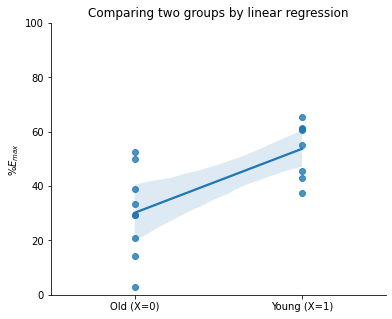

In [14]:
fig, ax = plt.subplots(figsize=(6,5))
sns.regplot(x='X', y='y', data=data, ax=ax)
plt.xticks([0,1], ['Old (X=0)', 'Young (X=1)'])
plt.xlabel('')
plt.xlim([-.5, 1.5])
plt.ylim([0, 100])
plt.ylabel(r"$\%E_{max}$")
plt.title("Comparing two groups by linear regression")
sns.despine();

In [15]:
import pingouin as pg

lm = pg.linear_regression(X=data['X'], y=data['y'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,30.167,4.574,6.596,0.000,0.454,0.418,20.418,39.915
1,X,23.546,6.667,3.531,0.003,0.454,0.418,9.335,37.757


The slope of the best-fit regression line equals the difference between the means, because X values are one unit apart. The slope is 23.55 with 95% CI ranging from 9.338% to 37.75%, matching the results reported by the unpaired t test. Of note, the CI of the slope equals the CI for the difference between two means.

The P value from linear regression tests the null hypothesis that the slope is horizontal, another way to state the null hypothesis of the unpaired t test that the two populations share the same mean. Therefore the P value determined by linear regression is identical to the P value reported by the t test.

### Goodness of fit and R²

In [16]:
X_2 = data['X']
y_2 = data['y']
res = stats.linregress(x=X_2, y=y_2)
res.slope

23.545833333333334

In [18]:
X_2 = data['X']
y_2 = data['y']

res = stats.linregress(x=X_2, y=y_2)

beta_0_2 = res.intercept
beta_1_2 = res.slope

rss_2 = compute_rss(estimate_y(X_2, beta_0_2, beta_1_2), y_2)
tss_2 = compute_rss(np.mean(y_2),                        y_2)

print(f"scatter from regression line (RSS): {rss_2:6.1f}")
print(f"scatter from horizontal line (TSS): {tss_2:6.1f}")
print(f"R² using TSS and RSS: {1-rss_2/tss_2:.3f}")
print(f"Percentage of variation for the regression line = {rss_2/tss_2:3.1%}")

scatter from regression line (RSS): 2824.1
scatter from horizontal line (TSS): 5172.2
R² using TSS and RSS: 0.454
Percentage of variation for the regression line = 54.6%


The t test recast as a comparison of models:

| Hypothesis  | Scatter from | Sum of squares | Variation | R²    |
|:----------- |:------------ |:-------------- |:--------- |:----- |
| Null        | Grand mean   |      5172      |   100.0%  |       |
| Alternative | Group meand  |      2824      |    54.6%  |       |
| Difference  | Improvement  |      2348      |    45.4%  | 0.454 |

Of all the variation (sum of squares from the null hypothesis **grand mean**), 54.6% is caused by scatter within the groups, and 45.4% of the total variation is caused by a difference between the two **group means**.

### Residues

We plot the difference the distance between each value and the grand mean, by ignoring any distinctions between the two groups, and the distance of each value from its own group mean.

In [19]:
# calculating the mean for each group
data.groupby('X').mean()

,y
X,
0,30.166667
1,53.712500


In [20]:
data['dist_grand'] = data['y'] - data['y'].mean()

In [21]:
data['dist_group'] = data.groupby('X')['y'].transform(lambda x: x - x.mean())

In [22]:
data['group'] = data['X'].map({0: 'old', 1: 'young'})
data

,X,y,dist_grand,dist_group,group
0,0,20.8,-20.447059,-9.366667,old
1,0,2.8,-38.447059,-27.366667,old
2,0,50.0,8.752941,19.833333,old
3,0,33.3,-7.947059,3.133333,old
4,0,29.4,-11.847059,-0.766667,old
5,0,38.9,-2.347059,8.733333,old
6,0,29.4,-11.847059,-0.766667,old
7,0,52.6,11.352941,22.433333,old
8,0,14.3,-26.947059,-15.866667,old
9,1,45.5,4.252941,-8.212500,young


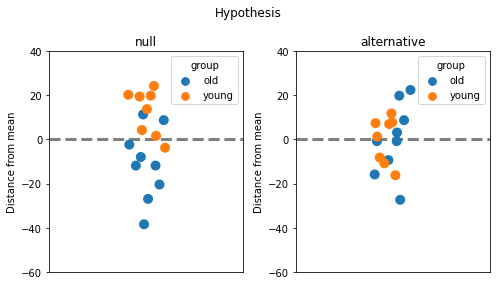

In [23]:
plt.figure(figsize=(7,4))
plt.subplot(121)
ax=sns.stripplot(x=[0]*len(data), y='dist_grand', data=data, size=10, hue='group',)
plt.title('null')
plt.xticks([])
plt.ylim(-60, 40)
plt.axhline(y=0, lw=3, c='gray', ls='--')
plt.ylabel('Distance from mean')

plt.subplot(122)
sns.stripplot(x=[0]*len(data), y='dist_group', data=data, size=10, hue='group')
plt.title('alternative')
plt.xticks([])
plt.ylim(-60, 40)
plt.axhline(y=0, lw=3, c='gray', ls='--')
plt.ylabel('Distance from mean')

plt.suptitle("Hypothesis")
plt.tight_layout();

In [24]:
ss_grand = data['dist_grand'].apply(lambda x: x**2).sum() # sum of squares in H0
ss_group = data.groupby('X')['dist_group'].transform(lambda x: x**2).sum() # sum of squares in alternative

print(f"sum of the squared distances from grand mean (TSS) = {ss_grand:.0f}")
print(f"sum of the squared distances from group mean (RSS) = {ss_group:.0f}")

sum of the squared distances from grand mean (TSS) = 5172
sum of the squared distances from group mean (RSS) = 2824


## P value

The t test recast as a comparison of models:

| Source of variation | Hypothesis  | Scatter from | Sum squares | DF | MS     | F ratio | P value |
|:------------------- |:----------- |:------------ |:----------- |:-- |:------ |:------- |:------- |
| Between groups      | Difference  | Improvement  |     2348    | 1  | 2348.0 |  12.47  | 0.0030  |
| Within groups       | Alternative | Group mean   |     2824    | 15 | 188.3  |         |         |
| Total               | Null        | Grand mean   |     5172    | 16 |        |         |         |

1. _Total_ shows the fit of the null hypothesis model, 17 data points - one parameter (grand mean) leaves DF = 16.
2. _Within groups_ shows the fit of the alternative model, two parameters are fitted (the mean of each group) leaving DF = 17 - 2 = 15.
3. _Between groups_ shows the difference, the alternative model has one more parameter than the null hypothesis model, so there if only 1 DF.

Mean square (MS) also called *variances* is the RSS divided by DF.

If the null hypothesis were correct, you'd expect the sum of squares around the individual means to be a bit smaller than the sum of squares around the grand mean. But after dividing by df, the MS values would be expected to be about the same if the null hypothesis were in fact true. Therefore, if the null hypothesis were true, the ratio of the two MS values would be expected to be close to 1.0. In this example, the F ratio equals 12.47.

The F distribution under the null hypothesis is known, and the P value can be computed. It answers the question, if the simpler model were correct, what is the chance that randomly chosen values would have group means far enough apart to yield an F ratio of 12.47 or higher?

In [25]:
n_2 = len(data)
dfn_2, dfd_2 = 1, n_2-2 # dfs for the difference btw grand mean and group means

F_2 = ((tss_2 - rss_2) / dfn_2) / (rss_2 / dfd_2)
print(f"F ratio = {F_2:.2f}")

F ratio = 12.47


In [26]:
p_value_2 = stats.f(dfn_2, dfd_2).sf(F_2) # same as 1 - cdf()
print(f"P values computed from the F ratio distribution = {p_value_2:5.4f}")
F_crit_2 = stats.f(dfn_2, dfd_2).ppf(.95)
print(f"Critical value computed from the F ratio distribution = {F_crit_2:.1f}")

P values computed from the F ratio distribution = 0.0030
Critical value computed from the F ratio distribution = 4.5


The t test can be viewed as comaring how well the data are fit by two models.

The goodness of fit of the two models is compared to see whether there is substantial evidence to reject the simpler null hypothesis, that the two groups of data are sampled from two populations with the same mean) model, or an horizontal line with a slope equal to zero, and accept the alternative model, that the population means differ. Viewed as linear regression, in the previous example the slope is not zero.

### Visualization of the F distribution

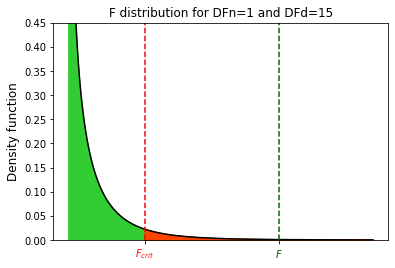

In [27]:
x = np.linspace(0, 18, num=500)
rvf_2 = stats.f(dfn_2, dfd_2)
plt.plot(x, rvf_2.pdf(x), color='black')
hx = rvf_2.pdf(x)

plt.margins(y = 0)
plt.ylim((0, .45))

# Shade the probability p-value
plt.fill_between(x[x <= F_2], hx[x <= F_2], edgecolor = None, color = 'limegreen')
# plot the observed F ratio
plt.axvline(x = F_2, color = "darkgreen", linestyle = "--")
# Shade the probability alpha
plt.fill_between(
    x[x >= F_crit_2], hx[x >= F_crit_2], 
    edgecolor = "orangered", linestyle = "-", linewidth = 2, facecolor = 'orangered')

# plot the critical F value
plt.axvline(x = F_crit_2, color = "red", linestyle = "--")

ax=plt.gca()
ax.set_xticks([F_crit_2, F_2])
ax.set_xticklabels(["$F_{crit}$", "$F$"], fontdict={'size': 10})
ax.get_xticklabels()[0].set_color("red")
ax.get_xticklabels()[1].set_color("darkgreen")
plt.ylabel('Density function', fontdict={'size': 12})
plt.title(f"F distribution for DFn={dfn_2} and DFd={dfd_2}");

### Analysis using statsmodels.api.anova_lm()

There is a function in scipy.stats that generate the ANOVA table for the different models generated.

In [28]:
import statsmodels.formula.api as smf

In [29]:
grandmean = smf.ols(formula='y ~ 1', data=data).fit()
groupmean = smf.ols(formula='y ~ X', data=data).fit()

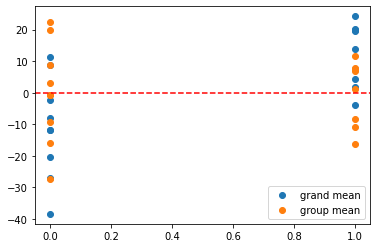

In [30]:
plt.scatter(data['X'], grandmean.resid, label='grand mean')
plt.scatter(data['X'], groupmean.resid, label='group mean')
plt.axhline(0, color='r', linestyle='--')
plt.legend();

In [32]:
for name, model in {'grand mean': grandmean, 'group mean': groupmean}.items():
    print(name)
    print(f"MSE residues: {model.mse_resid:.2f}")
    print(f"R² = {model.rsquared:.3f}")
    print(f"F ratio = {model.fvalue:.2f}")
    print('---')

grand mean
MSE residues: 323.26
R² = 0.000
F ratio = nan
---
group mean
MSE residues: 188.28
R² = 0.454
F ratio = 12.47
---


In [33]:
import statsmodels.api as sm

In [34]:
sm.stats.anova_lm(grandmean)

,df,sum_sq,mean_sq,F,PR(>F)
Residual,16.0,5172.222353,323.263897,NaN,NaN


In [35]:
sm.stats.anova_lm(groupmean)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,2348.073603,2348.073603,12.471405,0.003022
Residual,15.0,2824.148750,188.276583,NaN,NaN


### Likelihood ratio test (LRT)

Most of the time you are not sure of the model you want to fit. You might have a broad idea of the different forms of the function but you don't really know for example what would be the best degree for your poynomial or if all the covariables are actually necessary. Of course you could say that you are keeping the model that fit the best in term of $ R^2 $. But the question really is: is that bunch of extra parameters that are complexifying my model worth the increase in $R^2$?

We touched that question by asking about the significance of parameters values. Again if you are confident on the noise distribution you are dealing with (let's say it is normally distributed), and you have a function in mind but you don't know if you should include 1,2 or $p$ covariables then the problem is easy: you can use a log-likelihood ratio test.

To perform a likelihood ratio test you just have to calculate the difference between the maximised log-likelihood of the two models you are comparing. You can estimate the significance of that difference either by using a test statistic (approximate method) or by simulation.

LRT are to be used in the case of nested function comparison. Nested functions are functions that have the same form but differ from the number of parameters used : for example comparing $y=\beta_1 x_1 +c$ and $y=\beta_1 x_1 +\beta_2 x_2 +c$. In this course this will always be the case (but just remember that outside of this course you might want to do other comparison, so be carefull).

Quickly :

You want to compare model $M_0$ and $M_1$, respectively having $\{\beta_{1,0}\}$ and $\{\beta_{1,2},\beta_{2,2}\}$ as parameters. You want to see if adding this extra parameter $\beta_{2,2}$ is worth it.

The LRT statistics is :

$2*(l(Y;\hat{\beta}_{1,2},\hat{\beta}_{2,2},X)-l(Y;\hat{\beta}_{1,0},X))$

Where the hat represents the maximum likelihood estimates. The LRT statistic asymptoptically, for your sample size going to infinity, follows a **chi-square distribution with a number of degree of freedom equal to the difference between the number of degrees of freedom in your models**. You have thus access to a P-value which will help you to decide if complexifying your model is worth it.

To calulate this P-value you can use 1-scipy.stats.chi2.cdf(LRT,$df_{M_1}-df_{M_0}$), where $df$ is the number of degree of freedom of the models.